In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


In [3]:
user = pd.read_csv("user_table.csv")
test = pd.read_csv("test_table.csv")

In [4]:
print("User table shape: ", user.shape)
print("test table shape: ", test.shape)

User table shape:  (452867, 4)
test table shape:  (453321, 9)


In [5]:
display(user.head(3))

display(test.head(3))

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0


## cautions
1. Need to exclude spanish people from data, since we are just experimenting with old translation vs. new translation
2. Need to exclude English and other languages from data, since we are experimenting with universal Spanish translation vs. local Spanish translation
3. Need to check if date is correct

In [6]:
#join two tables 
df = user.merge(test, how = 'inner', on = 'user_id')
df.head(3)

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1


In [7]:
#check null values from each column
for col in df.columns:
    print("{} has {} percent of null values".format(col, df[col].isnull().sum()/df.shape[0]))

user_id has 0.0 percent of null values
sex has 0.0 percent of null values
age has 0.0 percent of null values
country has 0.0 percent of null values
date has 0.0 percent of null values
source has 0.0 percent of null values
device has 0.0 percent of null values
browser_language has 0.0 percent of null values
ads_channel has 0.598793906378694 percent of null values
browser has 0.0 percent of null values
conversion has 0.0 percent of null values
test has 0.0 percent of null values


In [8]:
## take a look at frequency table
for column in ['browser_language', 'test', 'country','date']:
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

col_0,% observations
browser_language,
EN,0.139288
ES,0.832827
Other,0.027885


col_0,% observations
test,
0,0.523538
1,0.476462


col_0,% observations
country,
Argentina,0.103194
Bolivia,0.024564
Chile,0.043582
Colombia,0.119373
Costa Rica,0.011723
Ecuador,0.035099
El Salvador,0.018052
Guatemala,0.033398
Honduras,0.018919


col_0,% observations
date,
2015-11-30,0.156664
2015-12-01,0.156591
2015-12-02,0.155854
2015-12-03,0.219488
2015-12-04,0.311403


In [8]:
#take a look at above features with converted
for column in ['browser_language', 'test', 'country']:
    freq_table = pd.crosstab(index=df[column], columns=df['conversion'], normalize='index')

conversion,0,1
browser_language,,
EN,0.951616,0.048384
ES,0.950241,0.049759
Other,0.950507,0.049493


conversion,0,1
test,,
0,0.944844,0.055156
1,0.956589,0.043411


conversion,0,1
country,,
Argentina,0.986006,0.013994
Bolivia,0.951366,0.048634
Chile,0.950296,0.049704
Colombia,0.948668,0.051332
Costa Rica,0.946506,0.053494
Ecuador,0.950928,0.049072
El Salvador,0.949235,0.050765
Guatemala,0.950347,0.049653
Honduras,0.950747,0.049253


create new dataset by excluding spain from country and (english, other) from browser languages

One quick observation is that control group and experiment group is not perfectly balanced

In [9]:
## take a look at frequency table from new dataset
new_df = df[(df.country != 'Spain') & (df.browser_language != 'EN') & (df.browser_language != 'Other')]
for column in ['test', 'country']:
    display(pd.crosstab(index=new_df[column], columns='% observations', normalize='columns'))

col_0,% observations
test,
0,0.462304
1,0.537696


col_0,% observations
country,
Argentina,0.116753
Bolivia,0.027705
Chile,0.049199
Colombia,0.134276
Costa Rica,0.013107
Ecuador,0.039705
El Salvador,0.020284
Guatemala,0.037753
Honduras,0.021457


In [10]:
new_df.head(3)

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1


sex


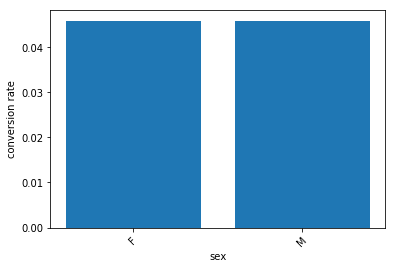

date


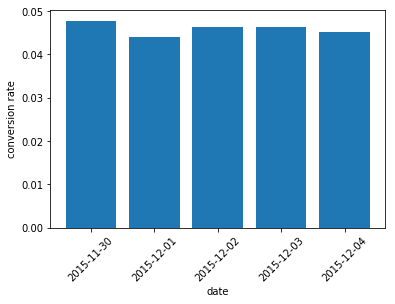

country


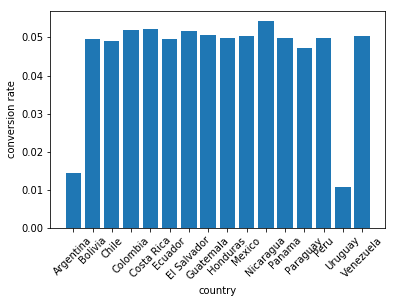

source


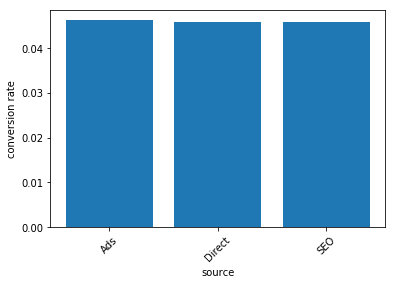

device


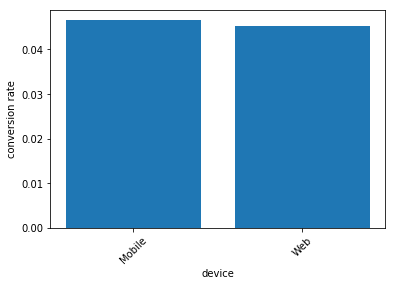

ads_channel


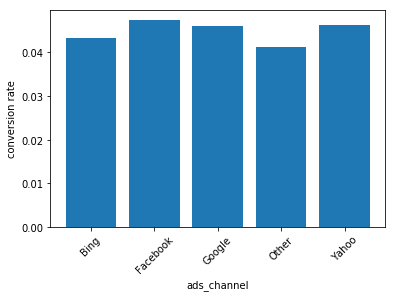

browser


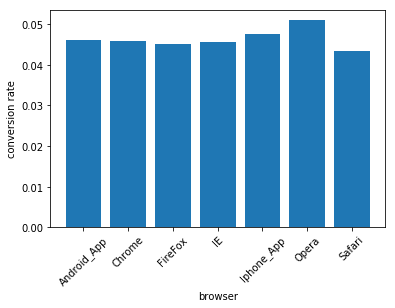

test


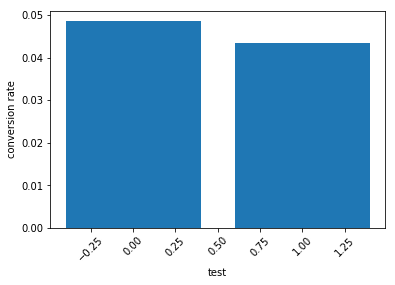

In [11]:
for column in ['sex', 'date', 'country', 'source','device', 'ads_channel','browser', 'test']:
    print(column)
    freq_table = pd.crosstab(index = new_df[column], columns= new_df['conversion'], normalize='index')
    plt.bar(x = freq_table.index, height = freq_table[1])
    plt.xlabel(column)
    plt.ylabel('conversion rate')
    plt.xticks(rotation = '45')
    plt.show()

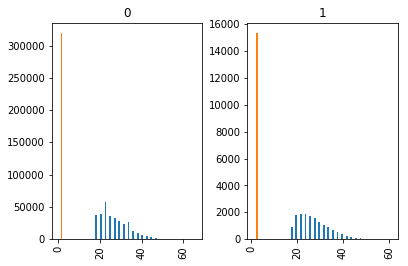

In [22]:
hist_age = new_df[['age','conversion']].hist(bins = 30, by = 'conversion')
plt.show()

Based on above barplots 
1. we found that Argentina and Uraguay have very low conversion rate, and it is possible that this is caused by inappropriate translation from local people
2. We can confirm that control group(0) indeed has higher conversion rate than experiment group(1)

### Now use machine learning to confirm our assumption

In [12]:
#Because ads_channel has ~ 60% of null values, we can consider remove this column
new_df = new_df.drop(['ads_channel', 'user_id'], axis = 1)

In [13]:
new_df.head(3)

,sex,age,country,date,source,device,browser_language,browser,conversion,test
0,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Android_App,0,1
1,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Safari,0,0
2,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Android_App,0,1


In [14]:
#we should also convert text to ints
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['sex','country','source','device','browser_language','browser']:
    new_df[column] = le.fit_transform(new_df[column])

In [15]:
new_df.describe()

,sex,age,country,source,device,browser_language,browser,conversion,test
count,334014.000000,334014.000000,334014.000000,334014.000000,334014.000000,334014.0,334014.000000,334014.000000,334014.000000
mean,0.583227,27.124707,7.153865,0.998344,0.554923,0.0,1.835196,0.045878,0.537696
std,0.493025,6.781171,4.591949,0.894390,0.496975,0.0,1.919332,0.209221,0.498578
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,22.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,26.000000,9.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000
75%,1.000000,31.000000,9.000000,2.000000,1.000000,0.0,3.000000,0.000000,1.000000
max,1.000000,66.000000,15.000000,2.000000,1.000000,0.0,6.000000,1.000000,1.000000


In [16]:
new_df.head(3)

,sex,age,country,date,source,device,browser_language,browser,conversion,test
0,1,20,9,2015-12-02,0,0,0,0,0,1
1,0,27,10,2015-12-04,0,1,0,6,0,0
2,1,23,3,2015-11-30,0,0,0,0,0,1


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

new_df = new_df.drop(['date','browser_language'], axis = 1)
X,y = new_df.loc[:, new_df.columns != 'conversion'].values, new_df['conversion'].values
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print("Accuracy: {}".format(accuracy_score(y_true = y_test, y_pred=predictions)))

confusion_matrix(y_true = y_test, y_pred = predictions)

Accuracy: 0.950900653659997


array([[95272,   351],
       [ 4569,    13]], dtype=int64)

In [20]:
#check feature importance
from take-home-challenges import helper_f

SyntaxError: invalid syntax (<ipython-input-20-a9b9ad0adb95>, line 2)